In [1]:
%load_ext autoreload
%autoreload 2

# Weather and Affect

## References

- [Weather Conditions - OpenWeatherMap](https://openweathermap.org/weather-conditions)

## Overview

Is there a correlation between current weather conditions and affective states?

- Assign emotion label to entries
- Determine weather code
- Plot frequency

In [3]:
import pandas as pd

from pathlib import Path

In [4]:
data_dir = Path("../data/")

In [5]:
files = list(data_dir.glob("*.csv"))

In [6]:
files

[PosixPath('../data/2075-6-9-DayOne.csv'),
 PosixPath('../data/018ddb0871178004f720631bcfcad79b.csv'),
 PosixPath('../data/01cebc061bbd5852bf3e9249dd2dd08e.csv')]

In [161]:
weather_df1 = pd.read_csv(files[1])
weather_df2 = pd.read_csv(files[2])

In [164]:
weather_df1.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,12.86,...,9.3,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,6.44,...,10.8,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,7.34,...,NaN,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n
3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,6.48,...,NaN,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n
4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,6.00,...,NaN,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n


In [163]:
weather_df2.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1496275200,2017-06-01 00:00:00 +0000 UTC,-25200,San Francisco,37.774929,-122.419415,16.38,NaN,13.30,16.21,...,NaN,NaN,NaN,NaN,NaN,71,803,Clouds,broken clouds,04d
1,1496278800,2017-06-01 01:00:00 +0000 UTC,-25200,San Francisco,37.774929,-122.419415,15.91,NaN,13.39,15.78,...,NaN,NaN,NaN,NaN,NaN,65,803,Clouds,broken clouds,04d
2,1496282400,2017-06-01 02:00:00 +0000 UTC,-25200,San Francisco,37.774929,-122.419415,15.27,NaN,13.12,15.12,...,NaN,NaN,NaN,NaN,NaN,73,803,Clouds,broken clouds,04d
3,1496286000,2017-06-01 03:00:00 +0000 UTC,-25200,San Francisco,37.774929,-122.419415,14.37,NaN,13.74,14.37,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
4,1496289600,2017-06-01 04:00:00 +0000 UTC,-25200,San Francisco,37.774929,-122.419415,14.01,NaN,13.54,14.00,...,NaN,NaN,NaN,NaN,NaN,80,803,Clouds,broken clouds,04n


In [167]:
weather_df = pd.concat([weather_df1, weather_df2])

In [168]:
weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,12.86,...,9.3,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,6.44,...,10.8,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,7.34,...,NaN,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n
3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,6.48,...,NaN,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n
4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,6.00,...,NaN,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n


In [169]:
weather_df.to_csv("/home/jovyan/work/research/data/weather.csv")

In [171]:
weather_df["date"] = weather_df["dt_iso"].apply(lambda r: r[:19])

In [172]:
pd.to_datetime(df["date"])

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                 ...        
213298   2022-07-03 19:00:00
213299   2022-07-03 20:00:00
213300   2022-07-03 21:00:00
213301   2022-07-03 22:00:00
213302   2022-07-03 23:00:00
Name: date, Length: 213303, dtype: datetime64[ns]

In [173]:
weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,12.86,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 00:00:00
1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,6.44,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 01:00:00
2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,7.34,...,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 02:00:00
3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,6.48,...,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 03:00:00
4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,6.00,...,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 04:00:00


In [175]:
weather_df[["dt", "dt_iso", "feels_like", "temp", "weather_description"]]

,dt,dt_iso,feels_like,temp,weather_description
0,1293840000,2011-01-01 00:00:00 +0000 UTC,12.86,13.07,overcast clouds
1,1293843600,2011-01-01 01:00:00 +0000 UTC,6.44,9.54,overcast clouds
2,1293847200,2011-01-01 02:00:00 +0000 UTC,7.34,9.50,light rain
3,1293850800,2011-01-01 03:00:00 +0000 UTC,6.48,8.80,light rain
4,1293854400,2011-01-01 04:00:00 +0000 UTC,6.00,8.94,light rain
...,...,...,...,...,...
40195,1640977200,2021-12-31 19:00:00 +0000 UTC,9.55,9.55,sky is clear
40196,1640980800,2021-12-31 20:00:00 +0000 UTC,9.41,10.57,sky is clear
40197,1640984400,2021-12-31 21:00:00 +0000 UTC,10.34,11.51,sky is clear
40198,1640988000,2021-12-31 22:00:00 +0000 UTC,11.18,12.40,sky is clear


In [176]:
weather_df.loc[(df['date'] >= '2014-11-30') & (df['date'] < '2014-12-01') & (df['city_name'] == 'Champaign')]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
143187,1417305600,2014-11-30 00:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,11.21,10000.0,8.61,10.58,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2014-11-30 00:00:00
143188,1417309200,2014-11-30 01:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,9.51,9656.0,8.12,6.72,...,NaN,NaN,NaN,NaN,1,701,Mist,mist,50n,2014-11-30 01:00:00
143189,1417312800,2014-11-30 02:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,10.46,10000.0,8.56,9.86,...,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n,2014-11-30 02:00:00
143190,1417316400,2014-11-30 03:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,10.94,10000.0,9.03,10.39,...,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n,2014-11-30 03:00:00
143191,1417320000,2014-11-30 04:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,10.89,10000.0,9.32,10.38,...,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n,2014-11-30 04:00:00
143192,1417323600,2014-11-30 05:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,10.48,9656.0,9.24,9.99,...,NaN,NaN,NaN,NaN,1,701,Mist,mist,50n,2014-11-30 05:00:00
143193,1417327200,2014-11-30 06:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,10.45,8047.0,9.21,9.95,...,NaN,NaN,NaN,NaN,1,701,Mist,mist,50n,2014-11-30 06:00:00
143194,1417330800,2014-11-30 07:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,10.47,9656.0,9.23,9.97,...,NaN,NaN,NaN,NaN,1,701,Mist,mist,50n,2014-11-30 07:00:00
143195,1417334400,2014-11-30 08:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,11.02,10000.0,9.93,10.61,...,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n,2014-11-30 08:00:00
143196,1417338000,2014-11-30 09:00:00 +0000 UTC,-21600,Champaign,40.11642,-88.243383,11.94,10000.0,10.84,11.62,...,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n,2014-11-30 09:00:00


In [177]:
weather_descriptions = weather_df["weather_description"].unique()

In [178]:
weather_descriptions.sort()

In [179]:
weather_descriptions

array(['broken clouds', 'drizzle', 'dust', 'few clouds', 'fog',
       'freezing rain', 'haze', 'heavy intensity drizzle',
       'heavy intensity rain', 'heavy snow', 'light intensity drizzle',
       'light intensity shower rain', 'light rain', 'light rain and snow',
       'light shower snow', 'light snow', 'mist', 'moderate rain',
       'overcast clouds', 'proximity thunderstorm', 'proximity tornado',
       'scattered clouds', 'shower drizzle', 'shower rain',
       'sky is clear', 'smoke', 'snow', 'squalls', 'thunderstorm',
       'thunderstorm with heavy rain', 'thunderstorm with light drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'very heavy rain'], dtype=object)

In [506]:
weather_df.to_csv("/home/jovyan/work/research/data/weather.csv")

In [32]:
entries = pd.read_csv("/home/jovyan/work/research/data/2075-6-9-DayOne.csv")

In [33]:
entries.head()

,date,text,uuid,duration,starred,isPinned,editingTime,modifiedDate,creationDevice,timeZoneIdentifier,...,locationTimeZoneName,locationUserLabel,locationUserType,regionCenterLatitude,regionCenterLongitude,regionRadius,activityName,ignoreStepCount,stepCount,mediaMD5s
0,2018-06-24T22:32:17.676Z,New journal who dis?\nI am wary of putting pri...,7B1F99DAFEE14499AFE7059582B6D261,0,False,False,0.0,2018-11-27T19:46:25.240Z,cyberdeck75,America/Chicago,...,NaN,NaN,NaN,41.936707,-87.676758,75.0,NaN,NaN,NaN,NaN
1,2018-06-25T05:34:28.030Z,Introduction\nThis will be where I log how I a...,7AECFE5C41DE471CBF6F1C9717B4120B,0,False,False,0.0,2018-11-27T19:46:25.240Z,cyberdeck75,America/Chicago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-25T05:35:33.856Z,Everything\nThe news cycle these days is all a...,AE8DC51CB1A6402CB9E774E9D66FD2F2,0,False,False,0.0,2018-11-27T19:46:25.239Z,cyberdeck75,America/Chicago,...,NaN,NaN,NaN,NaN,NaN,NaN,Stationary,True,-1.0,NaN
3,2018-06-26T20:06:49.645Z,D\nI think it is best that I do not go camping...,169B379A850F416FA6ABBD6EE9B4F8A7,0,False,False,0.0,2018-11-27T19:46:25.241Z,cyberdeck75,America/Los_Angeles,...,NaN,NaN,NaN,37.774719,-122.426392,75.0,Stationary,True,-1.0,NaN
4,2018-06-29T15:36:09.520Z,Regular Writing Goal\nIt is stunning how much ...,E4B6F3BE590F4DCDB0618F845CBEDCDC,0,False,False,0.0,2018-11-27T19:46:25.240Z,cyberdeck75,America/Los_Angeles,...,NaN,NaN,NaN,37.774715,-122.426422,75.0,Stationary,True,-1.0,NaN


In [35]:
entries.weatherCode

0           mostly-cloudy
1                     NaN
2                     NaN
3                   clear
4                   clear
5             clear-night
6                     NaN
7           partly-cloudy
8     mostly-cloudy-night
9           partly-cloudy
10          partly-cloudy
11          mostly-cloudy
12          mostly-cloudy
13          mostly-cloudy
14           cloudy-night
15                 cloudy
16          partly-cloudy
17          partly-cloudy
18                 cloudy
19                 cloudy
20                    NaN
21          partly-cloudy
22          mostly-cloudy
23          partly-cloudy
24                 cloudy
25          partly-cloudy
26           cloudy-night
27                    fog
28          partly-cloudy
29           cloudy-night
30          partly-cloudy
31          partly-cloudy
32           cloudy-night
33          mostly-cloudy
34           cloudy-night
35          partly-cloudy
36          mostly-cloudy
37                  clear
38          

In [180]:
weather_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,12.86,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 00:00:00
1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,6.44,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 01:00:00
2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,7.34,...,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 02:00:00
3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,6.48,...,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 03:00:00
4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,6.00,...,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40195,1640977200,2021-12-31 19:00:00 +0000 UTC,-28800,San Francisco,37.774929,-122.419415,9.55,NaN,3.94,9.55,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d,2021-12-31 19:00:00
40196,1640980800,2021-12-31 20:00:00 +0000 UTC,-28800,San Francisco,37.774929,-122.419415,10.57,NaN,4.49,9.41,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d,2021-12-31 20:00:00
40197,1640984400,2021-12-31 21:00:00 +0000 UTC,-28800,San Francisco,37.774929,-122.419415,11.51,NaN,4.49,10.34,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d,2021-12-31 21:00:00
40198,1640988000,2021-12-31 22:00:00 +0000 UTC,-28800,San Francisco,37.774929,-122.419415,12.40,NaN,4.13,11.18,...,NaN,NaN,NaN,NaN,2,800,Clear,sky is clear,01d,2021-12-31 22:00:00


In [181]:
weather_df.iloc[0]

dt                                        1293840000
dt_iso                 2011-01-01 00:00:00 +0000 UTC
timezone                                      -21600
city_name                                    Chicago
lat                                        41.878114
lon                                       -87.629798
temp                                           13.07
visibility                                   10000.0
dew_point                                      11.97
feels_like                                     12.86
temp_min                                        7.14
temp_max                                       13.34
pressure                                        1005
sea_level                                        NaN
grnd_level                                       NaN
humidity                                          93
wind_speed                                       5.1
wind_deg                                         170
wind_gust                                     

In [182]:
weather_df.iloc[1]

dt                                        1293843600
dt_iso                 2011-01-01 01:00:00 +0000 UTC
timezone                                      -21600
city_name                                    Chicago
lat                                        41.878114
lon                                       -87.629798
temp                                            9.54
visibility                                   10000.0
dew_point                                       8.47
feels_like                                      6.44
temp_min                                        7.02
temp_max                                       12.84
pressure                                        1005
sea_level                                        NaN
grnd_level                                       NaN
humidity                                          93
wind_speed                                       6.7
wind_deg                                         170
wind_gust                                     

In [80]:
entries_df = pd.read_csv("/home/jovyan/work/research/data/entries.csv")

In [81]:
entries_df

,id,_hash,uuid,date,emotion,context,sentiment,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04T05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,NaN
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05T03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,NaN
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05T18:00:10,joy,angry|disgusted,POSITIVE,NaN
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10T18:00:01,neutral,angry|devastated,POSITIVE,NaN
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12T21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,NaN
...,...,...,...,...,...,...,...,...
238,20210718062511,ae1f896aa8999d2c5c3b9543c0e4bf4a,413D6185B13C4BDBA3AE9B8C29237944,2021-07-18T06:25:11,neutral,joyful|terrified,NEGATIVE,New York
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07T21:09:47,neutral,terrified,POSITIVE,NaN
240,20210828053633,85e53e507fc613478699f21e1e6ebc90,473AB1B87CA84079872520C585AE3904,2021-08-28T05:36:33,anger,proud|excited|angry,NEGATIVE,Chicago
241,20220629001153,2e6f10ed44e23ba91c0f9c36b5b83b09,FD44D72956044DA49B208FE1362DC513,2022-06-29T00:11:53,sadness,content|apprehensive,POSITIVE,Teaneck


In [83]:
entries_df.loc[(entries_df['date'] >= '2012-08-01') & (entries_df['date'] < '2014-08-01')]

,id,_hash,uuid,date,emotion,context,sentiment,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04T05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,NaN
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05T03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,NaN
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05T18:00:10,joy,angry|disgusted,POSITIVE,NaN
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10T18:00:01,neutral,angry|devastated,POSITIVE,NaN
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12T21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,NaN
...,...,...,...,...,...,...,...,...
145,20140723162428,315d616e67f325ee3c3d879afa107eb7,E245A43C685E40329AE598DD7C521FD6,2014-07-23T16:24:28,fear,apprehensive|angry|prepared,POSITIVE,NaN
146,20140723220500,ab49022c865b630c7b5f8b5a7cac519f,733F15B3D3534371A5B5BF0768F57D2B,2014-07-23T22:05:00,neutral,disappointed|afraid|trusting,POSITIVE,NaN
147,20140724002657,e1e19d764bfe558198ce662d5e11a5e8,C1EED33985AD43BA9FBF1269B265DC13,2014-07-24T00:26:57,neutral,disappointed|anticipating|annoyed|joyful|senti...,NEGATIVE,NaN
148,20140724014100,ba0305793e1f7850e41b625af0a3c2ee,104938472F3345DEAE2C31365CE35085,2014-07-24T01:41:00,neutral,apprehensive|terrified|annoyed|devastated|angr...,NEGATIVE,NaN


In [84]:
entries_df.loc[~entries_df['city_name'].isna()]

,id,_hash,uuid,date,emotion,context,sentiment,city_name
188,20180624223217,e0c0c995f69b0ec17ace64cda05cbb18,7B1F99DAFEE14499AFE7059582B6D261,2018-06-24T22:32:17,fear,proud,POSITIVE,Chicago
191,20180626200649,e703c75fd71064a5c2b5526440792125,169B379A850F416FA6ABBD6EE9B4F8A7,2018-06-26T20:06:49,neutral,guilty,NEGATIVE,San Francisco
192,20180629153609,664301a2b98f90df3c6854cbc2060e61,E4B6F3BE590F4DCDB0618F845CBEDCDC,2018-06-29T15:36:09,surprise,trusting,POSITIVE,San Francisco
193,20180630074210,a6f1c9b38d49f04d8af30c658dc84629,4696CD3DF2694313BD10B649013B67A5,2018-06-30T07:42:10,sadness,angry|excited|anxious|trusting,NEGATIVE,San Francisco
195,20180710154751,a63d7ee271a70aec9b98a0acc3a8ce05,39D2109F966D458B87D94F2BC850B82D,2018-07-10T15:47:51,neutral,sentimental|joyful|angry|annoyed|excited|trusting,NEGATIVE,San Francisco
196,20180717030211,d3000a088ecfe27434262336482092ee,F3A3A48179C04C10845DD558AE0BD754,2018-07-17T03:02:11,fear,sentimental,POSITIVE,Boston
197,20180726204959,df199a16ecbd08ee7ac266eeb1d93955,2A709313630E4BB8A5FD1ABEFF4E57B1,2018-07-26T20:49:59,neutral,angry|terrified|anticipating,NEGATIVE,San Francisco
198,20180727003323,635bb2fb06e1384f8277a71181aaaa8b,387B7F2681914745AA59FB0F87D61097,2018-07-27T00:33:23,sadness,anxious|apprehensive|devastated|hopeful|angry|...,NEGATIVE,San Francisco
199,20180729170630,0f2254cf9ae63edc0f770c0af16671e8,2C1AD2EB90274C82A857F91C93BA4158,2018-07-29T17:06:30,neutral,angry|content|terrified|trusting|disgusted,NEGATIVE,San Francisco
200,20180730161753,d5354d0866b348d72029c1e4a2749d16,D569878EF6D04E75827AF2B3F7B9A636,2018-07-30T16:17:53,disgust,sentimental|angry|proud|annoyed,NEGATIVE,San Francisco


In [85]:
entries_df.loc[(entries_df['date'] > '2014-07-31') & (entries_df['date'] < '2017-06-01'), "city_name"] = "Champaign"

In [86]:
entries_df.loc[(entries_df['date'] > '2014-07-31') & (entries_df['date'] < '2017-06-01')]

,id,_hash,uuid,date,emotion,context,sentiment,city_name
149,20140731014540,a48829fcbd388757ad2529a4973f161c,6284707F99334D77A90B6BB05D560A4D,2014-07-31T01:45:40,sadness,apprehensive|anticipating|excited|angry,NEGATIVE,Champaign
150,20140814044247,499c9e552a8a059fdb53cdcdd3ab1f6b,D976E3CAB73A4B9AA3A94EFBE2A62B1A,2014-08-14T04:42:47,anger,anticipating|proud|apprehensive,NEGATIVE,Champaign
151,20140814203647,5d5e35b6859e0f8a0272d43d1ceeebad,F1D0E7DA8A4F44DD904E2657DD0D6B95,2014-08-14T20:36:47,sadness,anticipating,POSITIVE,Champaign
152,20140823064608,acc2f8e391354fe5f42952297907b56f,BBE4453BAE634893BB7B3406E7890ACF,2014-08-23T06:46:08,neutral,anticipating|content|angry|trusting|devastated...,NEGATIVE,Champaign
153,20140828145808,dd83dd37cf7eb34d501219fc26147714,4B62B363B4BC410AA031F4835A614D44,2014-08-28T14:58:08,neutral,angry|apprehensive,NEGATIVE,Champaign
154,20140830231350,8c6207fa53b8cab3abcda2507b1d3ce0,EBEA1684EB474853BD313059C1AF554D,2014-08-30T23:13:50,sadness,angry|annoyed|apprehensive|disgusted|anxious|a...,NEGATIVE,Champaign
155,20140901032300,e770a1159c699751f3577236de91ba1e,0E4AACDCD481495AA75A9EC62B83CABB,2014-09-01T03:23:00,sadness,anticipating|apprehensive|devastated|terrified...,NEGATIVE,Champaign
156,20140901210508,92499619eca98923f6d4cf56a1634ef7,68E42F5AFAE94CA7AF564E6A1F404088,2014-09-01T21:05:08,sadness,angry|proud|disgusted,NEGATIVE,Champaign
157,20140903035307,3159748898516b07c40e5f3893aecc19,16AC1157B4C047AAA880C16DCACA3505,2014-09-03T03:53:07,sadness,angry|trusting|devastated|anxious|joyful|appre...,NEGATIVE,Champaign
158,20141107021249,7d2d9db42c6596d4895ab8c54517a9d3,C0A2608AF9664EF7AA7CB22388D5189F,2014-11-07T02:12:49,sadness,angry|apprehensive|anticipating,NEGATIVE,Champaign


In [90]:
entries_df.loc[(entries_df['date'] < '2014-08-01'), "city_name"] = "Chicago"

In [91]:
entries_df

,id,_hash,uuid,date,emotion,context,sentiment,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04T05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05T03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05T18:00:10,joy,angry|disgusted,POSITIVE,Chicago
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10T18:00:01,neutral,angry|devastated,POSITIVE,Chicago
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12T21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago
...,...,...,...,...,...,...,...,...
238,20210718062511,ae1f896aa8999d2c5c3b9543c0e4bf4a,413D6185B13C4BDBA3AE9B8C29237944,2021-07-18T06:25:11,neutral,joyful|terrified,NEGATIVE,New York
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07T21:09:47,neutral,terrified,POSITIVE,NaN
240,20210828053633,85e53e507fc613478699f21e1e6ebc90,473AB1B87CA84079872520C585AE3904,2021-08-28T05:36:33,anger,proud|excited|angry,NEGATIVE,Chicago
241,20220629001153,2e6f10ed44e23ba91c0f9c36b5b83b09,FD44D72956044DA49B208FE1362DC513,2022-06-29T00:11:53,sadness,content|apprehensive,POSITIVE,Teaneck


In [92]:
entries_df.loc[entries_df["city_name"].isna()]

,id,_hash,uuid,date,emotion,context,sentiment,city_name
189,20180625053428,3880c117a74dbb50b502d031a421edf8,7AECFE5C41DE471CBF6F1C9717B4120B,2018-06-25T05:34:28,neutral,proud,POSITIVE,NaN
190,20180625053533,b50c251df9b7c0a275c2b4a1f30ac397,AE8DC51CB1A6402CB9E774E9D66FD2F2,2018-06-25T05:35:33,disgust,anxious|sentimental|joyful|terrified|hopeful,NEGATIVE,NaN
194,20180709031329,e5cc94ccad206677a8ea4c8093d986e5,8F31CF0AC65B4F619BCCB784A765D5E2,2018-07-09T03:13:29,sadness,angry|disgusted|anxious|trusting,NEGATIVE,NaN
207,20180805170717,80eee46e72829551a334d8d914cc3500,B0B6D8E1AA5349B9B9B2FB522AB1452C,2018-08-05T17:07:17,neutral,proud|angry|sentimental|apprehensive,NEGATIVE,NaN
225,20181127194656,8f07455200fa28539a652c72d16cae3e,62A44A02CAAF4586AC1D23A6513128C6,2018-11-27T19:46:56,sadness,prepared|angry|trusting|anticipating,NEGATIVE,NaN
231,20190204182342,d6b0a321d7b52e0e1249e08fc33508c5,F03792ED182F425EACD5471FB23D9890,2019-02-04T18:23:42,neutral,disgusted,POSITIVE,NaN
235,20210713004328,03e4ff22aa75d45283dd264ab098f2d9,8758F0FB2F7A46F1B233FF97563F82F0,2021-07-13T00:43:28,sadness,apprehensive|anticipating|terrified,NEGATIVE,NaN
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07T21:09:47,neutral,terrified,POSITIVE,NaN


In [96]:
entries_df.loc[(entries_df['date'] >= '2017-06-01') & (entries_df['date'] < '2020-01-01') & entries_df['city_name'].isna(), "city_name"] = "San Francisco"

In [99]:
entries_df.loc[entries_df['city_name'].isna(), "city_name"] = "Chicago"

In [101]:
entries_df.to_csv("/home/jovyan/work/research/data/entries_fixed.csv")

In [102]:
entries_df

,id,_hash,uuid,date,emotion,context,sentiment,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04T05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05T03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05T18:00:10,joy,angry|disgusted,POSITIVE,Chicago
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10T18:00:01,neutral,angry|devastated,POSITIVE,Chicago
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12T21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago
...,...,...,...,...,...,...,...,...
238,20210718062511,ae1f896aa8999d2c5c3b9543c0e4bf4a,413D6185B13C4BDBA3AE9B8C29237944,2021-07-18T06:25:11,neutral,joyful|terrified,NEGATIVE,New York
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07T21:09:47,neutral,terrified,POSITIVE,Chicago
240,20210828053633,85e53e507fc613478699f21e1e6ebc90,473AB1B87CA84079872520C585AE3904,2021-08-28T05:36:33,anger,proud|excited|angry,NEGATIVE,Chicago
241,20220629001153,2e6f10ed44e23ba91c0f9c36b5b83b09,FD44D72956044DA49B208FE1362DC513,2022-06-29T00:11:53,sadness,content|apprehensive,POSITIVE,Teaneck


In [128]:
entries_df["date"] = pd.to_datetime(entries_df["date"])

In [129]:
entries_df

,id,_hash,uuid,date,emotion,context,sentiment,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,Chicago
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,Chicago
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago
...,...,...,...,...,...,...,...,...
238,20210718062511,ae1f896aa8999d2c5c3b9543c0e4bf4a,413D6185B13C4BDBA3AE9B8C29237944,2021-07-18 06:25:11,neutral,joyful|terrified,NEGATIVE,New York
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07 21:09:47,neutral,terrified,POSITIVE,Chicago
240,20210828053633,85e53e507fc613478699f21e1e6ebc90,473AB1B87CA84079872520C585AE3904,2021-08-28 05:36:33,anger,proud|excited|angry,NEGATIVE,Chicago
241,20220629001153,2e6f10ed44e23ba91c0f9c36b5b83b09,FD44D72956044DA49B208FE1362DC513,2022-06-29 00:11:53,sadness,content|apprehensive,POSITIVE,Teaneck


In [183]:
row = entries_df.iloc[0]
date = row["date"]

In [184]:
date 

Timestamp('2012-08-04 05:37:31')

In [188]:
weather_df["date"] = pd.to_datetime(weather_df["date"])

In [189]:
weather_df.loc[(weather_df["date"] >= date) & (weather_df["date"] < date + pd.DateOffset(hours=1)) & (weather_df["city_name"] == "Champaign")]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
121706,1344060000,2012-08-04 06:00:00 +0000 UTC,-18000,Champaign,40.11642,-88.243383,23.52,10000.0,20.66,24.12,...,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n,2012-08-04 06:00:00


In [485]:
def find_weather(date, city_name, key):
    return weather_df.loc[(weather_df["date"] >= date) & (weather_df["date"] < date + pd.DateOffset(hours=1)) & (weather_df["city_name"] == city_name), key][:1]


def get_weather(date, city_name, key):
    result = find_weather(date, city_name, key)
    if result.empty:
        return
    return result.iloc[0]

In [488]:
main = get_weather(entries_df.iloc[0].date, "Chicago", "weather_main")
clouds_all = get_weather(entries_df.iloc[0].date, "Chicago", "clouds_all")

print(main, clouds_all)

Clear 1


In [491]:
entries_df["clouds_all"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "clouds_all"), axis=1)

In [289]:
entries_df["clouds_all"] = entries_df.apply(lambda e: "|".join(get_weather(e.date, e.city_name, "weather_main").values), axis=1)

In [493]:
entries_df["clouds_all"]

0       1.0
1      40.0
2      40.0
3      75.0
4      75.0
       ... 
238     NaN
239    90.0
240    20.0
241     NaN
242     NaN
Name: clouds_all, Length: 243, dtype: float64

In [494]:
entries_df["weather"].value_counts()

Clouds          139
Clear            53
Rain             26
Mist              9
Snow              7
                  6
Haze              2
Thunderstorm      1
Name: weather, dtype: int64

In [495]:
entries_df.to_csv("/home/jovyan/work/research/data/entries_with_weather.csv")

,id,_hash,uuid,date,emotion,context,sentiment,city_name,weather,cover,clouds_all
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago,Clear,clear,1.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago,Clouds,precipitation,40.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,Chicago,Clouds,precipitation,40.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,Chicago,Clouds,precipitation,75.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago,Clouds,precipitation,75.0
...,...,...,...,...,...,...,...,...,...,...,...
233,20190302184029,fe30d3c8d9dd0ce3f5b8f2fb2e1faeea,937750322C0A4048A84E4B9A701E589B,2019-03-02 18:40:29,fear,anticipating|disgusted|angry|proud|annoyed|tru...,NEGATIVE,San Francisco,Rain,precipitation,100.0
234,20190422052116,7ec63eb9e81cadbd0bb6f43b9f64c042,CAE4542CC0AB4E57A20FC62B6A5A1A4E,2019-04-22 05:21:16,sadness,angry|anticipating|disappointed|joyful,NEGATIVE,San Francisco,Clouds,precipitation,23.0
235,20210713004328,03e4ff22aa75d45283dd264ab098f2d9,8758F0FB2F7A46F1B233FF97563F82F0,2021-07-13 00:43:28,sadness,apprehensive|anticipating|terrified,NEGATIVE,Chicago,Rain,precipitation,75.0
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07 21:09:47,neutral,terrified,POSITIVE,Chicago,Rain,precipitation,90.0


In [294]:
entries_df["emotion"].value_counts()

neutral     94
sadness     88
fear        24
joy         11
disgust     10
surprise     9
anger        7
Name: emotion, dtype: int64

In [295]:
entries_df["sentiment"].value_counts()

NEGATIVE    148
POSITIVE     95
Name: sentiment, dtype: int64

In [349]:
entries_df.loc[entries_df["weather"] != "Clear", "cover"] = "precipitation"

In [350]:
entries_df.loc[entries_df["weather"] == "Clear", "cover"] = "clear"

In [352]:
entries_df.to_csv("/home/jovyan/work/research/data/entries_with_cover.csv")

In [354]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,city_name,weather,cover
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago,Clear,clear
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago,Clouds,precipitation
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,Chicago,Clouds,precipitation
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,Chicago,Clouds,precipitation
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago,Clouds,precipitation


In [296]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [418]:
from scipy.stats import chi2_contingency, chi2, fisher_exact, chisquare

In [297]:
import seaborn as sns
sns.set()

<AxesSubplot:>

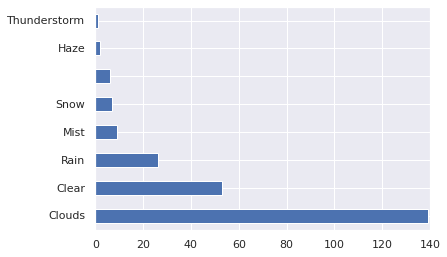

In [356]:
entries_df['weather'].value_counts().plot(kind='barh')

<AxesSubplot:>

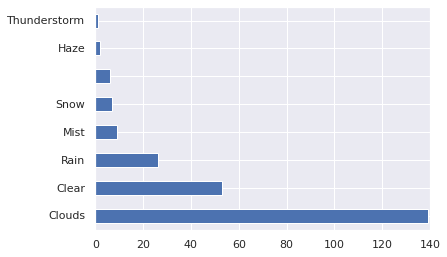

In [383]:
entries_df['weather'].value_counts().plot(kind='barh')

<AxesSubplot:>

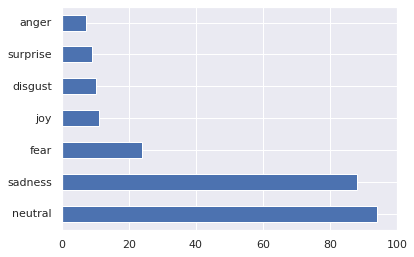

In [384]:
entries_df['emotion'].value_counts().plot(kind='barh')

<AxesSubplot:>

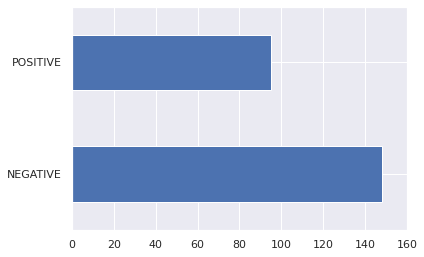

In [359]:
entries_df['sentiment'].value_counts().plot(kind='barh')

In [385]:
contingency = pd.crosstab(entries_df['weather'], entries_df['sentiment'])
contingency

sentiment,NEGATIVE,POSITIVE
weather,,
,1,5
Clear,35,18
Clouds,90,49
Haze,1,1
Mist,4,5
Rain,13,13
Snow,3,4
Thunderstorm,1,0


<AxesSubplot:xlabel='sentiment', ylabel='weather'>

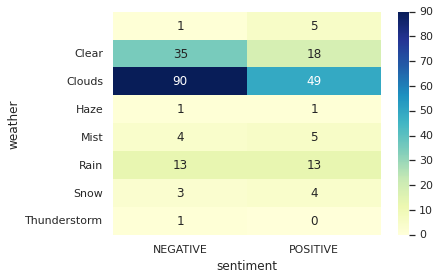

In [386]:
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [387]:
contingency_pct = pd.crosstab(entries_df['weather'], entries_df['sentiment'], normalize='index')
contingency_pct

sentiment,NEGATIVE,POSITIVE
weather,,
,0.166667,0.833333
Clear,0.660377,0.339623
Clouds,0.647482,0.352518
Haze,0.500000,0.500000
Mist,0.444444,0.555556
Rain,0.500000,0.500000
Snow,0.428571,0.571429
Thunderstorm,1.000000,0.000000


In [388]:
c, p, dof, expected = chi2_contingency(contingency)

In [389]:
p

0.16690573713077625

In [390]:
dof

7

In [391]:
c

10.40215699831465

In [392]:
expected

array([[ 3.65432099,  2.34567901],
       [32.27983539, 20.72016461],
       [84.65843621, 54.34156379],
       [ 1.218107  ,  0.781893  ],
       [ 5.48148148,  3.51851852],
       [15.83539095, 10.16460905],
       [ 4.26337449,  2.73662551],
       [ 0.6090535 ,  0.3909465 ]])

In [423]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = contingency


def chisquared_test(table, prob=0.95):
    print(table)
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [405]:
entries.shape[0]

59

In [407]:
entries_df['cover'].value_counts()

precipitation    190
clear             53
Name: cover, dtype: int64

In [408]:
entries_df['sentiment'].value_counts()

NEGATIVE    148
POSITIVE     95
Name: sentiment, dtype: int64

In [411]:
table = pd.crosstab(entries_df['cover'], entries_df['sentiment'])

In [412]:
table

sentiment,NEGATIVE,POSITIVE
cover,,
clear,35,18
precipitation,113,77


In [415]:
oddsr, p = fisher_exact(table, alternative='two-sided')

In [417]:
print(oddsr, p)

1.3249754178957718 0.42876010617147087


In [421]:
table2 = pd.crosstab(entries_df['cover'], entries_df['emotion'])

In [424]:
table2

emotion,anger,disgust,fear,joy,neutral,sadness,surprise
cover,,,,,,,
clear,1,2,7,2,15,23,3
precipitation,6,8,17,9,79,65,6


<AxesSubplot:xlabel='emotion', ylabel='cover'>

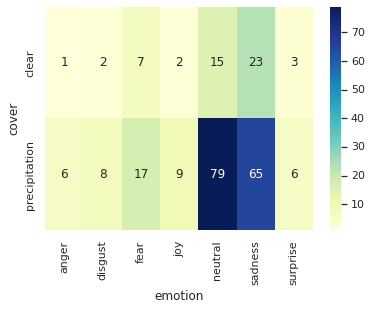

In [425]:
sns.heatmap(table2, annot=True, cmap="YlGnBu")

In [428]:
df = entries_df.loc[entries_df["emotion"] != "neutral"]

In [430]:
df.head()

,id,_hash,uuid,date,emotion,context,sentiment,city_name,weather,cover
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago,Clear,clear
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago,Clouds,precipitation
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,Chicago,Clouds,precipitation
5,20120819010007,99ee7d1249f6033322713faa11fc0bcf,6D2A73812A3D48228892A9E836A421CC,2012-08-19 01:00:07,joy,angry|disgusted,POSITIVE,Chicago,Clouds,precipitation
9,20120830010017,7e360d74ecbe74432e7009cc4baa3531,9413756437E8409CB12503C345C5D2B2,2012-08-30 01:00:17,surprise,angry|trusting,POSITIVE,Chicago,Clear,clear


In [431]:
df["emotion"].value_counts()

sadness     88
fear        24
joy         11
disgust     10
surprise     9
anger        7
Name: emotion, dtype: int64

In [433]:
df["sentiment"].value_counts()

NEGATIVE    98
POSITIVE    51
Name: sentiment, dtype: int64

In [449]:
table3 = pd.crosstab(entries_df['cover'], entries_df['sentiment'])

In [450]:
table3

sentiment,NEGATIVE,POSITIVE
cover,,
clear,35,18
precipitation,113,77


In [448]:
fisher_exact(table3, alternative="two-sided")

(0.8571428571428571, 0.6965482901760172)

In [451]:
fisher_exact(table3, alternative="two-sided")

(1.3249754178957718, 0.42876010617147087)

In [452]:
table3

sentiment,NEGATIVE,POSITIVE
cover,,
clear,35,18
precipitation,113,77


<AxesSubplot:xlabel='sentiment', ylabel='cover'>

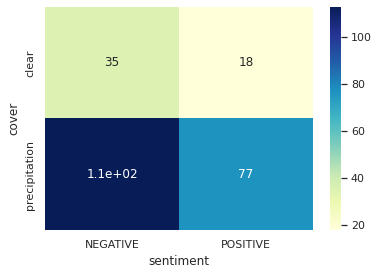

In [453]:
sns.heatmap(table3, annot=True, cmap="YlGnBu")

In [500]:
# cloud coverage
df = entries_df.loc[~entries_df["clouds_all"].isna()]
df

,id,_hash,uuid,date,emotion,context,sentiment,city_name,weather,cover,clouds_all
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago,Clear,clear,1.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago,Clouds,precipitation,40.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,Chicago,Clouds,precipitation,40.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,Chicago,Clouds,precipitation,75.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago,Clouds,precipitation,75.0
...,...,...,...,...,...,...,...,...,...,...,...
233,20190302184029,fe30d3c8d9dd0ce3f5b8f2fb2e1faeea,937750322C0A4048A84E4B9A701E589B,2019-03-02 18:40:29,fear,anticipating|disgusted|angry|proud|annoyed|tru...,NEGATIVE,San Francisco,Rain,precipitation,100.0
234,20190422052116,7ec63eb9e81cadbd0bb6f43b9f64c042,CAE4542CC0AB4E57A20FC62B6A5A1A4E,2019-04-22 05:21:16,sadness,angry|anticipating|disappointed|joyful,NEGATIVE,San Francisco,Clouds,precipitation,23.0
235,20210713004328,03e4ff22aa75d45283dd264ab098f2d9,8758F0FB2F7A46F1B233FF97563F82F0,2021-07-13 00:43:28,sadness,apprehensive|anticipating|terrified,NEGATIVE,Chicago,Rain,precipitation,75.0
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07 21:09:47,neutral,terrified,POSITIVE,Chicago,Rain,precipitation,90.0


In [504]:
df.loc[df["sentiment"] == "NEGATIVE", "sent"] = 0
df.loc[df["sentiment"] == "POSITIVE", "sent"] = 1

/tmp/ipykernel_144229/545899945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["sentiment"] == "NEGATIVE", "sent"] = 0


In [505]:
df

,id,_hash,uuid,date,emotion,context,sentiment,city_name,weather,cover,clouds_all,sent
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,Chicago,Clear,clear,1.0,0.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,Chicago,Clouds,precipitation,40.0,0.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,Chicago,Clouds,precipitation,40.0,1.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,Chicago,Clouds,precipitation,75.0,1.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,Chicago,Clouds,precipitation,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233,20190302184029,fe30d3c8d9dd0ce3f5b8f2fb2e1faeea,937750322C0A4048A84E4B9A701E589B,2019-03-02 18:40:29,fear,anticipating|disgusted|angry|proud|annoyed|tru...,NEGATIVE,San Francisco,Rain,precipitation,100.0,0.0
234,20190422052116,7ec63eb9e81cadbd0bb6f43b9f64c042,CAE4542CC0AB4E57A20FC62B6A5A1A4E,2019-04-22 05:21:16,sadness,angry|anticipating|disappointed|joyful,NEGATIVE,San Francisco,Clouds,precipitation,23.0,0.0
235,20210713004328,03e4ff22aa75d45283dd264ab098f2d9,8758F0FB2F7A46F1B233FF97563F82F0,2021-07-13 00:43:28,sadness,apprehensive|anticipating|terrified,NEGATIVE,Chicago,Rain,precipitation,75.0,0.0
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07 21:09:47,neutral,terrified,POSITIVE,Chicago,Rain,precipitation,90.0,1.0
